# Code for creating Figure 3

In [1]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymodulon.compare import *
import math
import seaborn as sns
import numbers
import matplotlib
from scipy.stats import sem

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['font.family'] = 'sans-serif'
sns.set_style('ticks')
matplotlib.rcParams['text.color'] = '#000000'
matplotlib.rcParams['axes.labelcolor'] = '#000000'
matplotlib.rcParams['xtick.color'] = '#000000'
matplotlib.rcParams['ytick.color'] = '#000000'

In [2]:
#load ICA object
ica_PS = load_json_model('p_syringae_2.json')

In [4]:
#list of iModulons
iMs = ica_PS.imodulon_table.index.tolist()

### Figure 3A

In [5]:
# function to find mean iModulon activity at all time points for 'immunity_time' samples
def immunity_time_means(k, ica):
    
    '''
    Time course plot for immunity time samples for PS
    
    k = iM name
    ica = ica_PS
    '''
    
    #iModulon index in A matrix
    im_list = ica.A.index.values.tolist()
    n = im_list.index(k)
    
    #empty list to store sample means
    sample_means = []
         
    #list of conditions and times    
    conditions = ['mock_1hpi', 'mock_3hpi','mock_5hpi','flg22_1hpi','flg22_3hpi','flg22_5hpi']
    time = [1.0, 3.0, 5.0]
    
    #sample table with only immunity_time samples
    sample_table_imm_t = ica.sample_table.loc[ica.sample_table.project == 'immunity_time']
            
    #group samples from each condition (grouping based on condition name=grouping based on time)
    condition_group = sample_table_imm_t.groupby('condition_name')
    
    #mean of sample activities at each time point
    for c in conditions:
        samples_at_t = condition_group.get_group(c).index.tolist()
        activities = ica.A[samples_at_t].iloc[n]
        sample_means.append(activities.mean())
    
    return sample_means

In [6]:
#initializing dataframes for mean iModulon activities for control ('mock') and flg22 infiltration samples from
#'immunity_time' project

data_mock = pd.DataFrame(index = iMs, columns = ['1hpi', '3hpi', '5hpi'])
data_flg22 = pd.DataFrame(index = iMs, columns = ['1hpi', '3hpi', '5hpi'])


#filling up dataframes with mean iModulon actvities 
for idx1, row in data_mock.iterrows():
    data_mock.loc[idx1, '1hpi'] = immunity_time_means(idx1, ica_PS)[0]
    data_mock.loc[idx1, '3hpi'] = immunity_time_means(idx1, ica_PS)[1]
    data_mock.loc[idx1, '5hpi'] = immunity_time_means(idx1, ica_PS)[2]
    
data_mock = data_mock[data_mock.columns].astype(float)

for idx1, row in data_flg22.iterrows():
    data_flg22.loc[idx1, '1hpi'] = immunity_time_means(idx1, ica_PS)[3]
    data_flg22.loc[idx1, '3hpi'] = immunity_time_means(idx1, ica_PS)[4]
    data_flg22.loc[idx1, '5hpi'] = immunity_time_means(idx1, ica_PS)[5]
    
data_flg22 = data_flg22[data_flg22.columns].astype(float)

In [7]:
#combining both dataframes
data_immunity_time = pd.concat([data_mock, data_flg22], axis=1)

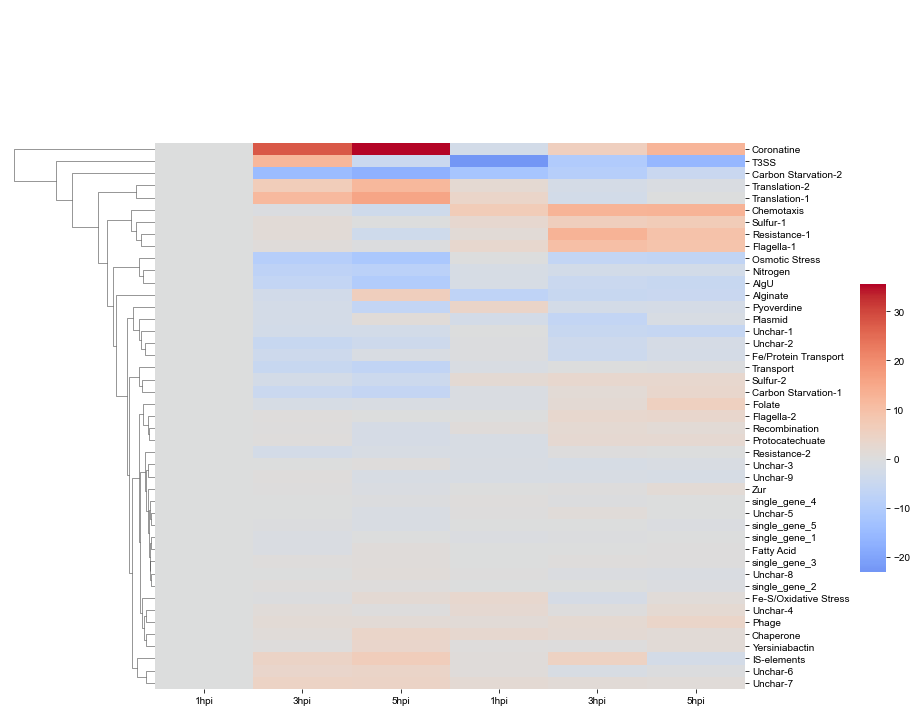

In [10]:
#clustermap of all iModulon activities across all time points in immunity_time samples
ax = sns.clustermap(data_immunity_time, 
                    col_cluster = False, 
                    figsize = (12,10), 
                    yticklabels = True,
                   cbar_pos=(1, .2, .03, .4),
                   cmap = 'coolwarm',
                   center = 0)

In [11]:
#creating a reduced dataframe with only iModulons with absolute values of activity levels greater than 8
# (with the exception of Flagella-2 iModulon, in order to show upregulation of motility)
data_immunity_time_reduced = data_immunity_time

# remove rows with all (absolute) values less than 10 (except Flagella-1; want to show all motility iMs)
for idx, row in data_immunity_time.iterrows():
    if idx != 'Flagella-2':
    # arrange values in each row in descending order of absolute values and check if the first value (highest) is <= 8
        if data_immunity_time.loc[idx].abs().sort_values(ascending = False).values[0] <= 8:
            data_immunity_time_reduced = data_immunity_time_reduced.drop(idx)

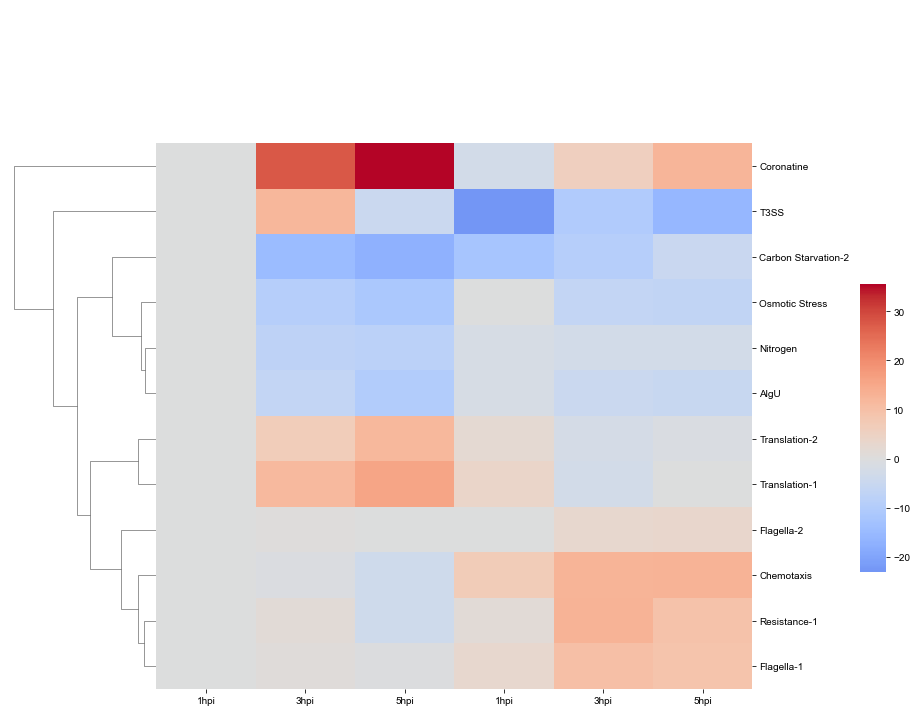

In [13]:
#fig3A
#clustermap of selected iModulons across all time points in immunity_time samples
ax = sns.clustermap(data_immunity_time_reduced,
                    col_cluster = False, 
                    figsize = (12,10), 
                    yticklabels = True,
                   cbar_pos=(1, .2, .03, .4),
                   cmap = 'coolwarm',
                   center = 0)

### Fig 3B

In [14]:
# function to find standard deviation of iModulon activity at each time point in immunity_time samples

def immunity_time_stdev(k, ica):
    
    '''
    Time course plot for immunity time samples for PS
    
    k = iM name
    ica = ica_PS
    '''
    
    #iModulon index in A matrix
    im_list = ica.A.index.values.tolist()
    n = im_list.index(k)
    
    #empty list to store sample means
    sample_stdev = []
         
    #list of conditions and times    
    conditions = ['mock_1hpi', 'mock_3hpi','mock_5hpi','flg22_1hpi','flg22_3hpi','flg22_5hpi']
    time = [1.0, 3.0, 5.0]
    
    #sample table with only immunity_time samples
    sample_table_imm_t = ica.sample_table.loc[ica.sample_table.project == 'immunity_time']
            
    #group samples from each condition (grouping based on condition name=grouping based on time)
    condition_group = sample_table_imm_t.groupby('condition_name')
    
    #mean of sample activities at each time point
    for c in conditions:
        samples_at_t = condition_group.get_group(c).index.tolist()
        activities = ica.A[samples_at_t].iloc[n]
        sample_stdev.append(activities.std())
    
    return sample_stdev

In [15]:
# function to find standard error of the mean for iModulon activity at each time point in immunity_time samples

def immunity_time_sem(k, ica):
    
    '''
    Time course plot for immunity time samples for PS
    
    k = iM name
    ica = ica_PS
    '''
    
    #iModulon index in A matrix
    im_list = ica.A.index.values.tolist()
    n = im_list.index(k)
    
    #empty list to store sample means
    sample_sem = []
         
    #list of conditions and times    
    conditions = ['mock_1hpi', 'mock_3hpi','mock_5hpi','flg22_1hpi','flg22_3hpi','flg22_5hpi']
    time = [1.0, 3.0, 5.0]
    
    #sample table with only immunity_time samples
    sample_table_imm_t = ica.sample_table.loc[ica.sample_table.project == 'immunity_time']
            
    #group samples from each condition (grouping based on condition name=grouping based on time)
    condition_group = sample_table_imm_t.groupby('condition_name')
    
    #mean of sample activities at each time point
    for c in conditions:
        samples_at_t = condition_group.get_group(c).index.tolist()
        activities = ica.A[samples_at_t].iloc[n]
        sample_sem.append(sem(activities))
    
    return sample_sem

In [16]:
#initializing a dataframe with sample means and standard error of the mean for T3SS and Resistance-1 iModulons for flg22 samples
immunity_time_df_flg22 = pd.DataFrame(index = ['1hpi', '3hpi', '5hpi'], columns = ['mean_Res','sem_Res', 'mean_T3SS','sem_T3SS'])

In [17]:
#filling in dataframe with sample means and standard error of the mean for T3SS and Resistance-1 iModulons for flg22 samples

immunity_time_df_flg22['mean_Res'] = immunity_time_means('Resistance-1', ica_PS)[3:]
immunity_time_df_flg22['sem_Res'] = immunity_time_sem('Resistance-1', ica_PS)[3:]
immunity_time_df_flg22['mean_T3SS'] = immunity_time_means('T3SS', ica_PS)[3:]
immunity_time_df_flg22['sem_T3SS'] = immunity_time_sem('T3SS', ica_PS)[3:]

In [18]:
#initializing a dataframe with sample means and standard error of the mean for T3SS and Resistance-1 iModulons for mock samples
immunity_time_df_mock = pd.DataFrame(index = ['1hpi', '3hpi', '5hpi'], columns = ['mean_Res','sem_Res', 'mean_T3SS','sem_T3SS'])

In [19]:
#filling in dataframe with sample means and standard error of the mean for T3SS and Resistance-1 iModulons for mock samples

immunity_time_df_mock['mean_Res'] = immunity_time_means('Resistance-1', ica_PS)[:3]
immunity_time_df_mock['sem_Res'] = immunity_time_sem('Resistance-1', ica_PS)[:3]
immunity_time_df_mock['mean_T3SS'] = immunity_time_means('T3SS', ica_PS)[:3]
immunity_time_df_mock['sem_T3SS'] = immunity_time_sem('T3SS', ica_PS)[:3]

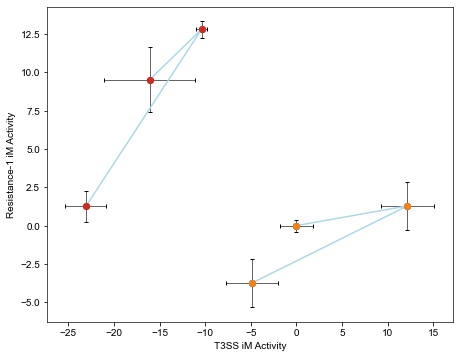

In [20]:
#plotting sample means of T3SS iModulon vs Resistance-1 iModulon at all three time points

plt.figure(figsize = (16, 5.8))

plt.subplot(1, 2, 1)
plt.scatter(immunity_time_df_mock['mean_T3SS'].values, immunity_time_df_mock['mean_Res'].values)
plt.xlabel('T3SS iM Activity')
plt.ylabel('Resistance iM Activity')
plt.errorbar(immunity_time_df_mock['mean_T3SS'].values, immunity_time_df_mock['mean_Res'].values, yerr = immunity_time_df_mock['sem_Res'].values, capsize = 2, elinewidth = 0.6, ecolor = 'black', fmt="o")
plt.errorbar(immunity_time_df_mock['mean_T3SS'].values, immunity_time_df_mock['mean_Res'].values, xerr = immunity_time_df_mock['sem_T3SS'].values, capsize = 2, elinewidth = 0.6, ecolor = 'black', fmt="o")
plt.plot(immunity_time_df_mock['mean_T3SS'].values, immunity_time_df_mock['mean_Res'].values, color = 'lightblue')

plt.subplot(1, 2, 1)

plt.scatter(immunity_time_df_flg22['mean_T3SS'].values, immunity_time_df_flg22['mean_Res'].values)
plt.xlabel('T3SS iM Activity')
plt.ylabel('Resistance-1 iM Activity')
plt.errorbar(immunity_time_df_flg22['mean_T3SS'].values, immunity_time_df_flg22['mean_Res'].values, yerr = immunity_time_df_flg22['sem_Res'].values, capsize = 2, elinewidth = 0.6, ecolor = 'black', fmt="o")
plt.errorbar(immunity_time_df_flg22['mean_T3SS'].values, immunity_time_df_flg22['mean_Res'].values, xerr = immunity_time_df_flg22['sem_T3SS'].values, capsize = 2, elinewidth = 0.6, ecolor = 'black', fmt="o")
plt.plot(immunity_time_df_flg22['mean_T3SS'].values, immunity_time_df_flg22['mean_Res'].values, color = 'lightblue')


### Fig 3C - D

In [21]:
# function to find mean iModulon activity for samples obtained from P. syringae strains expression AvrRpt2

def avr_samples(k, ica):
    
    '''
    Time course plot for immunity time samples for PS
    
    k = iM name
    ica = ica_PS
    '''
    
    #iModulon index in A matrix
    im_list = ica.A.index.values.tolist()
    n = im_list.index(k)
    
    #empty list to store sample means
    sample_means = []
         
    #list of AvrRpt2 conditions   
    conditions = ['AvrRpt2_DE', 'AvrRpt2_DEPS','AvrRpt2_PS','AvrRpt2_WT','AvrRpt2_npr1','AvrRpt2_pad4','AvrRpt2_sid2','AvrRpt2_stp','AvrRpt2_RR','AvrRpt2_b2b3']
    
    #sample table with only immunity_time samples
    sample_table_imm_iso = ica.sample_table.loc[ica.sample_table.project == 'immunity_isolated']
            
    #group samples from each condition (grouping based on condition name=grouping based on time)
    condition_group = sample_table_imm_iso.groupby('condition_name')
    
    #mean of sample activities at each time point
    for c in conditions:
        samples = condition_group.get_group(c).index.tolist()
        activities = ica.A[samples].iloc[n]
        sample_means.append(activities.mean())
    
    return sample_means

In [22]:
# function to find mean iModulon activity for samples obtained from wild-type P. syringae strains

def wt_samples(k, ica):
    
    '''
    Time course plot for immunity time samples for PS
    
    k = iM name
    ica = ica_PS
    '''
    
    #iModulon index in A matrix
    im_list = ica.A.index.values.tolist()
    n = im_list.index(k)
    
    #empty list to store sample means
    sample_means = []
         
    #list of AvrRpt2 conditions   
    conditions = ['WT_DE', 'WT_DEPS','WT_PS','WT_WT','WT_npr1','WT_pad4','WT_sid2','WT_stp', 'WT_SP','WT_WT_SA','WT_WT_chitin','WT_WT_mock']
    
    #sample table with only immunity_time samples
    sample_table_imm_iso = ica.sample_table.loc[ica.sample_table.project == 'immunity_isolated']
            
    #group samples from each condition (grouping based on condition name=grouping based on time)
    condition_group = sample_table_imm_iso.groupby('condition_name')
    
    #mean of sample activities at each time point
    for c in conditions:
        samples = condition_group.get_group(c).index.tolist()
        activities = ica.A[samples].iloc[n]
        sample_means.append(activities.mean())
    
    return sample_means

In [23]:
# initializing dataframe for mean iModulon activity in wild-type P. syringae and AvrRpt2-expression P. syringae strains 
data_wt = pd.DataFrame(index = iMs, columns = ['WT_DE', 'WT_DEPS','WT_PS','WT_WT','WT_npr1','WT_pad4','WT_sid2','WT_stp', 'WT_SP','WT_WT_SA','WT_WT_chitin','WT_WT_mock'])
data_avr = pd.DataFrame(index = iMs, columns = ['AvrRpt2_DE', 'AvrRpt2_DEPS','AvrRpt2_PS','AvrRpt2_WT','AvrRpt2_npr1','AvrRpt2_pad4','AvrRpt2_sid2','AvrRpt2_stp','AvrRpt2_RR','AvrRpt2_b2b3'])

In [24]:
# filling in dataframes with mean iModulon activity levels
for idx1, row in data_mock.iterrows():
    data_wt.loc[idx1, 'WT_DE'] = wt_samples(idx1, ica_PS)[0]
    data_wt.loc[idx1, 'WT_DEPS'] = wt_samples(idx1, ica_PS)[1]
    data_wt.loc[idx1, 'WT_PS'] = wt_samples(idx1, ica_PS)[2]
    data_wt.loc[idx1, 'WT_WT'] = wt_samples(idx1, ica_PS)[3]
    data_wt.loc[idx1, 'WT_npr1'] = wt_samples(idx1, ica_PS)[4]
    data_wt.loc[idx1, 'WT_pad4'] = wt_samples(idx1, ica_PS)[5]
    data_wt.loc[idx1, 'WT_sid2'] = wt_samples(idx1, ica_PS)[6]
    data_wt.loc[idx1, 'WT_stp'] = wt_samples(idx1, ica_PS)[7]
    data_wt.loc[idx1, 'WT_SP'] = wt_samples(idx1, ica_PS)[8]
    data_wt.loc[idx1, 'WT_WT_SA'] = wt_samples(idx1, ica_PS)[9]
    data_wt.loc[idx1, 'WT_WT_chitin'] = wt_samples(idx1, ica_PS)[10]
    data_wt.loc[idx1, 'WT_WT_mock'] = wt_samples(idx1, ica_PS)[11]

data_wt = data_wt[data_wt.columns].astype(float)

for idx1, row in data_flg22.iterrows():
    data_avr.loc[idx1, 'AvrRpt2_DE'] = avr_samples(idx1, ica_PS)[0]
    data_avr.loc[idx1, 'AvrRpt2_DEPS'] = avr_samples(idx1, ica_PS)[1]
    data_avr.loc[idx1, 'AvrRpt2_PS'] = avr_samples(idx1, ica_PS)[2]
    data_avr.loc[idx1, 'AvrRpt2_WT'] = avr_samples(idx1, ica_PS)[3]
    data_avr.loc[idx1, 'AvrRpt2_npr1'] = avr_samples(idx1, ica_PS)[4]
    data_avr.loc[idx1, 'AvrRpt2_pad4'] = avr_samples(idx1, ica_PS)[5]
    data_avr.loc[idx1, 'AvrRpt2_sid2'] = avr_samples(idx1, ica_PS)[6]
    data_avr.loc[idx1, 'AvrRpt2_stp'] = avr_samples(idx1, ica_PS)[7]
    data_avr.loc[idx1, 'AvrRpt2_RR'] = avr_samples(idx1, ica_PS)[8]
    data_avr.loc[idx1, 'AvrRpt2_b2b3'] = avr_samples(idx1, ica_PS)[9]
    
data_avr = data_avr[data_avr.columns].astype(float)

In [25]:
#combining dataframes
data_avr_vs_wt = pd.concat([data_wt, data_avr], axis=1)

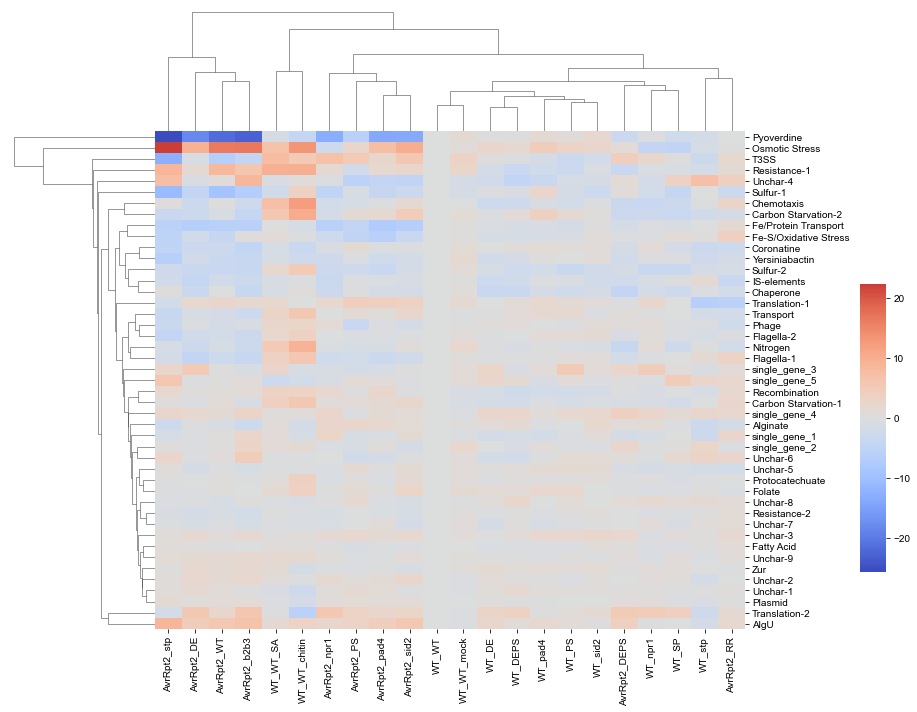

In [27]:
#clustermap of actvities of all iModulons
ax = sns.clustermap(data_avr_vs_wt, 
                    col_cluster = True, 
                    figsize = (12,10), 
                    yticklabels = True,
                   cbar_pos=(1, .2, .03, .4),
                   cmap = 'coolwarm',
                   center = 0)

In [28]:
# creating a reduced dataframe with only iModulons have absolute values of activity levels greater than 4
#also dropping iModulons in 'Noise' category (single gene iModulons)
data_avr_vs_wt_reduced = data_avr_vs_wt

data_avr_vs_wt_reduced = data_avr_vs_wt_reduced.drop('single_gene_1')
data_avr_vs_wt_reduced = data_avr_vs_wt_reduced.drop('single_gene_2')
data_avr_vs_wt_reduced = data_avr_vs_wt_reduced.drop('single_gene_3')
data_avr_vs_wt_reduced = data_avr_vs_wt_reduced.drop('single_gene_4')
data_avr_vs_wt_reduced = data_avr_vs_wt_reduced.drop('single_gene_5')

# remove rows with all (absolute) values less than 10 (except for Yersiniabactin, we want all Fe related iMs)
for idx, row in data_avr_vs_wt_reduced.iterrows():
    if idx != 'Yersiniabactin':
    # arrange values in each row in descending order of absolute values and check if the first value (highest) is <= 10
        if data_avr_vs_wt_reduced.loc[idx].abs().sort_values(ascending = False).values[0] <= 4:
            data_avr_vs_wt_reduced = data_avr_vs_wt_reduced.drop(idx)

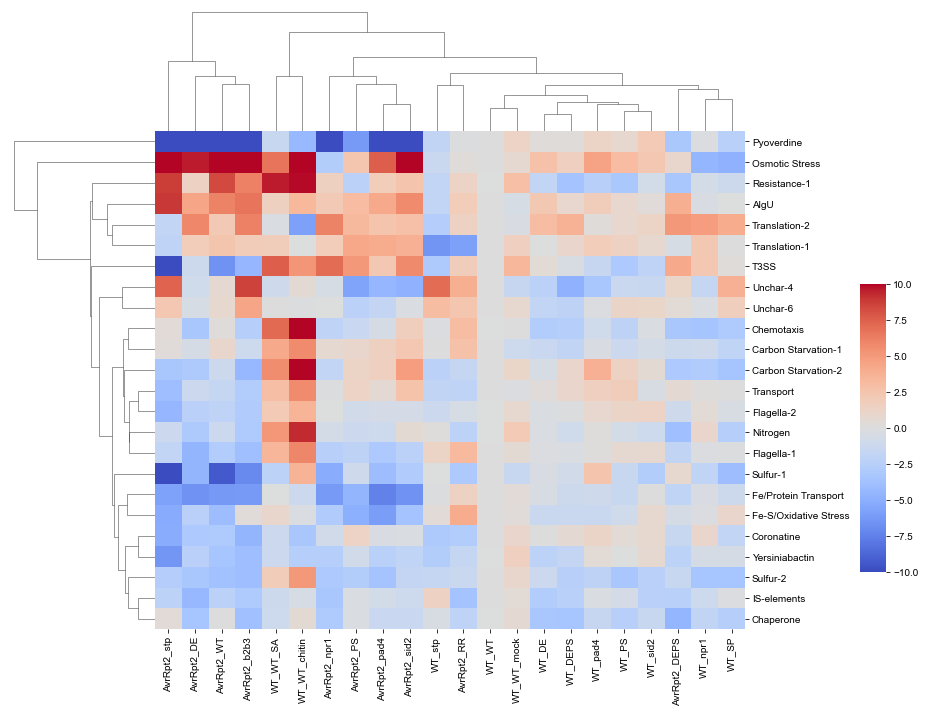

In [31]:
#clustermap of activities of selected iModulons
ax = sns.clustermap(data_avr_vs_wt_reduced, 
                    col_cluster = True, 
                    figsize = (12,10), 
                    yticklabels = True,
                   cbar_pos=(1, .2, .03, .4),
                   cmap = 'coolwarm',
                   center = 0,
                   vmin = -10,
                   vmax = 10)

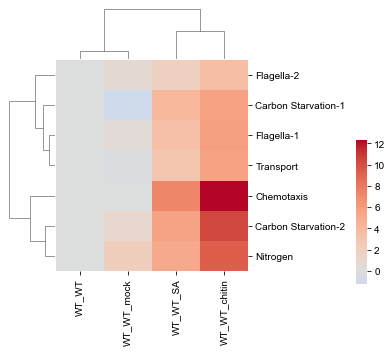

In [32]:
#fig 3C

#selecting PTI-asssociated cluster
cluster_1 = data_avr_vs_wt_reduced[['WT_WT','WT_WT_SA','WT_WT_chitin','WT_WT_mock']].loc[['Chemotaxis','Flagella-2','Flagella-1','Carbon Starvation-1','Transport','Carbon Starvation-2','Nitrogen']]

ax = sns.clustermap(cluster_1, 
                    figsize = (5,5),
                    col_cluster = True, 
                    yticklabels = True,
                   cbar_pos=(1, .2, .03, .4),
                   cmap = 'coolwarm',
                   center = 0)

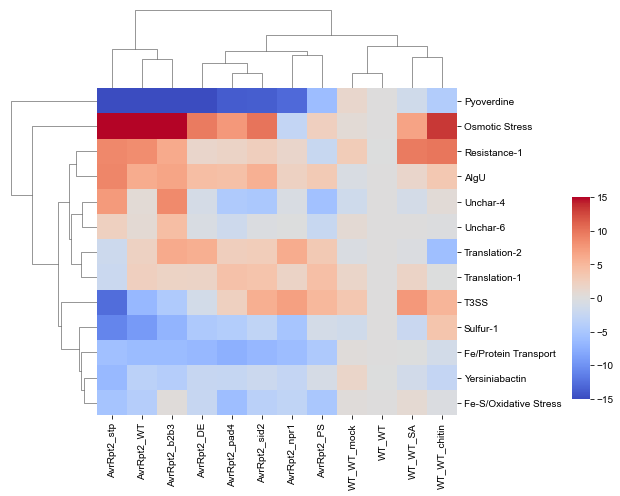

In [33]:
#fig 3D

# selecting cluster at top left corner
cluster_2 = data_avr_vs_wt_reduced[['AvrRpt2_stp','AvrRpt2_DE','AvrRpt2_WT','AvrRpt2_b2b3','WT_WT_SA','WT_WT_chitin','WT_WT_mock','WT_WT','AvrRpt2_npr1','AvrRpt2_PS','AvrRpt2_pad4','AvrRpt2_sid2']].loc[['Pyoverdine','Yersiniabactin','Resistance-1','Osmotic Stress','T3SS','Translation-2','AlgU','Translation-1','Fe-S/Oxidative Stress','Unchar-4','Unchar-6','Sulfur-1','Fe/Protein Transport']]

ax = sns.clustermap(cluster_2, 
                    col_cluster = True, 
                    figsize = (8,7), 
                    yticklabels = True,
                   cbar_pos=(1, .2, .03, .4),
                   cmap = 'coolwarm',
                   center = 0,
                   vmin = -15,
                   vmax = 15)

### Fig 3E

<AxesSubplot: xlabel='SRX3159007\nSRX3159027', ylabel='SRX3159006\nSRX3159008\nSRX3159009\nSRX3159014\nSRX3159015\nSRX3159016\nSRX3159017\nSRX3159022\nSRX3159023\nSRX3159024\nSRX3159025\nSRX3159028\nSRX3159030\nSRX3159041\nSRX3159045\nSRX3159047\nSRX3159052\nSRX3159053\nSRX3159054\nSRX3159055\nSRX3159057\nSRX3159058\nSRX3159060\nSRX3159061\nSRX3159062\nSRX3159076\nSRX3159080\nSRX3159089\nSRX3159090\nSRX3159091\nSRX3159094\nSRX3159095\nSRX3159099'>

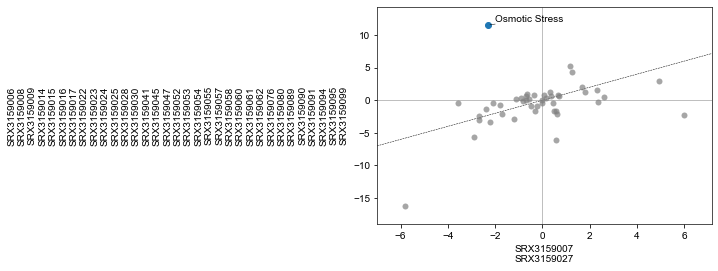

In [34]:
# DiMA plot of AvrRpt2 samples with and without A. thaliana npr1 deletion

plot_dima(ica_PS, ['SRX3159007', 'SRX3159027'], ['SRX3159006', 'SRX3159008', 'SRX3159009', 'SRX3159014',
       'SRX3159015', 'SRX3159016', 'SRX3159017', 'SRX3159022',
       'SRX3159023', 'SRX3159024', 'SRX3159025', 'SRX3159028',
       'SRX3159030', 'SRX3159041', 'SRX3159045', 'SRX3159047',
       'SRX3159052', 'SRX3159053', 'SRX3159054', 'SRX3159055',
       'SRX3159057', 'SRX3159058', 'SRX3159060', 'SRX3159061',
       'SRX3159062', 'SRX3159076', 'SRX3159080', 'SRX3159089',
       'SRX3159090', 'SRX3159091', 'SRX3159094', 'SRX3159095',
       'SRX3159099'], fdr = 0.5)

### Fig 3F

<AxesSubplot: xlabel='SRX3159006\nSRX3159014\nSRX3159022\nSRX3159028\nSRX3159045\nSRX3159052\nSRX3159055\nSRX3159061\nSRX3159076\nSRX3159080\nSRX3159083\nSRX3159089\nSRX3159094\nSRX3159098', ylabel='SRX3159069\nSRX3159073'>

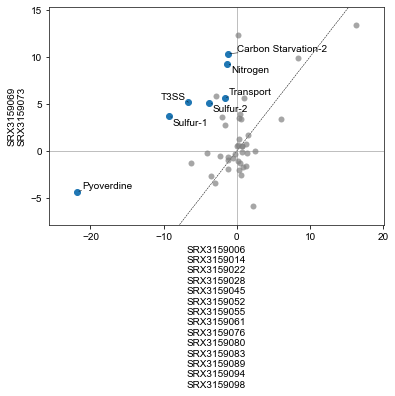

In [35]:
# DiMa plot of chitin-induced PTI vs AvrRpt2_WT-induced ETI

plot_dima(ica_PS, ['SRX3159006', 'SRX3159014', 'SRX3159022', 'SRX3159028', 'SRX3159045',
       'SRX3159052', 'SRX3159055', 'SRX3159061', 'SRX3159076', 'SRX3159080',
       'SRX3159083', 'SRX3159089', 'SRX3159094', 'SRX3159098'], ['SRX3159069','SRX3159073'], fdr = 0.35)